In [ ]:
import pandas as pd
import numpy as np
#вставить путь до данных после препроцессинга
df = pd.read_csv('')
reviews = np.array(df['text'].values.tolist())

In [ ]:
!pip install umap-learn

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
import umap
from sklearn.decomposition import PCA
# from sklearn.preprocessing import OneHotEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 895.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=34f6d6f6aaa5f6027ba21a6181a375f480c0cd9d9b3820c5990291a2935bed34
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
# embeddings = pd.read_parquet('drive/MyDrive/sirius/embeddings_reviews.parquet')
embeddings = pd.read_parquet('drive/MyDrive/sirius/embeddings_reviews_fasttext_sravni.parquet')
# embeddings = pd.read_parquet('drive/MyDrive/sirius/embeddings_reviews_word2vec.parquet')
# embeddings = pd.read_parquet('drive/MyDrive/sirius/embeddings_reviews_word2vec_sravni.parquet')
embeddings.shape

(10000, 300)

In [ ]:
embeddings

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.025038,-0.030607,0.007503,-0.005943,0.009640,-0.014752,0.013895,0.018847,-0.010334,-0.016017,...,-0.028134,-0.003583,-0.013499,-0.037840,-0.044144,-0.002510,-0.005347,0.006212,0.011269,-0.017613
1,0.016741,-0.043155,0.012777,0.013951,0.015306,-0.032621,-0.014659,-0.010355,-0.030145,-0.011517,...,-0.052580,-0.012895,0.014874,-0.070019,-0.048699,0.025769,0.002330,0.031170,-0.034708,-0.057202
2,0.020044,-0.012375,0.013872,-0.007471,-0.003072,-0.012934,-0.005081,0.012473,-0.015692,-0.019839,...,-0.032576,-0.007265,0.010175,-0.049105,-0.054825,0.005149,0.017802,0.014079,-0.005481,-0.019709
3,0.026563,-0.014480,0.001030,-0.009344,-0.005947,-0.023978,-0.011661,0.020555,-0.012640,-0.022044,...,-0.030038,-0.010315,0.027206,-0.054402,-0.045105,0.004202,0.032011,0.013322,-0.038544,-0.011031
4,0.023669,-0.028738,0.012594,0.011215,-0.002587,-0.007405,-0.017822,0.009455,-0.012953,-0.021439,...,-0.047110,-0.015305,0.009505,-0.050952,-0.051033,0.017277,-0.004930,0.018793,-0.015748,-0.008604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.015145,-0.034573,0.015472,0.002734,-0.008857,-0.015297,-0.017013,0.007863,-0.006308,-0.019325,...,-0.032406,-0.016421,0.005045,-0.039676,-0.047665,0.000110,0.005123,0.023806,-0.035332,-0.003755
9996,0.016526,-0.026699,-0.000516,-0.036845,0.001899,-0.003114,-0.014265,0.016026,-0.063387,0.018363,...,-0.024789,-0.018859,-0.003218,-0.064018,-0.046128,0.012386,0.000862,0.030599,-0.025053,-0.053660
9997,0.021437,-0.035415,0.015421,0.003138,0.004407,-0.021616,0.004214,0.004598,-0.007407,-0.021711,...,-0.028960,-0.009331,-0.015275,-0.036113,-0.030962,-0.000195,0.016627,0.020896,-0.012508,0.005976
9998,0.026272,-0.029911,-0.009527,-0.001944,-0.015062,-0.018038,0.002076,0.013349,-0.016382,-0.014700,...,-0.037271,-0.008274,-0.032514,-0.047926,-0.022743,-0.007613,0.035611,-0.010308,-0.012860,-0.008355


In [ ]:
tsne_reducer = TSNE(n_components=2, random_state=10)
umap_reducer = umap.UMAP()
pca_reducer = PCA(n_components=2)

In [ ]:
%%time
embeddings_pca = pca_reducer.fit_transform(embeddings)

CPU times: user 208 ms, sys: 178 ms, total: 386 ms
Wall time: 234 ms


In [ ]:
%%time
embeddings_umap = umap_reducer.fit_transform(embeddings)

CPU times: user 1min 4s, sys: 735 ms, total: 1min 5s
Wall time: 1min 14s


In [ ]:
%%time
embeddings_tsne = tsne_reducer.fit_transform(embeddings)

CPU times: user 3min 42s, sys: 588 ms, total: 3min 42s
Wall time: 2min 38s


# K-means

In [ ]:
%%time
inertia = []
silhouette = []
n = 10
for i in tqdm(range(1, n+1)):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init=10).fit(embeddings)
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

    if i == 1:
        silhouette.append(0)
    else:
        labels = kmeans.labels_
        score = silhouette_score(embeddings, labels)
        silhouette.append(score)

100%|██████████| 10/10 [01:27<00:00,  8.72s/it]

CPU times: user 2min, sys: 20.2 s, total: 2min 20s
Wall time: 1min 27s


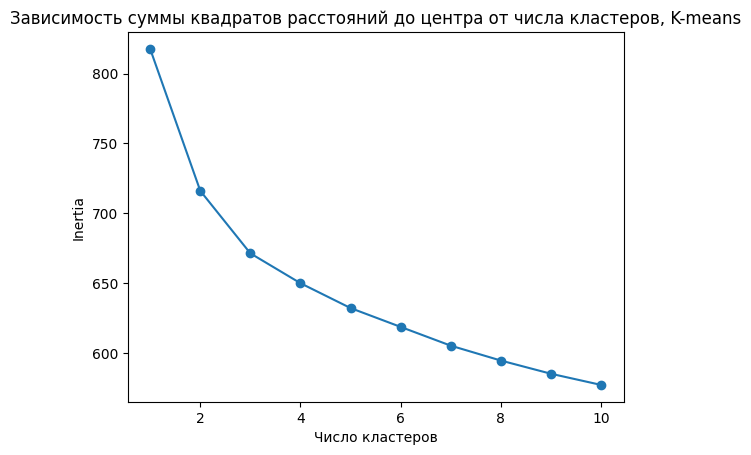

In [ ]:
plt.plot(range(1, n+1), inertia, marker='o')
plt.title('Зависимость суммы квадратов расстояний до центра от числа кластеров, K-means')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia');

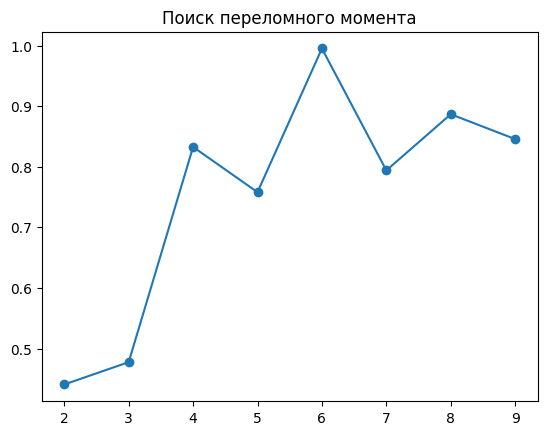

In [ ]:
D = []
for i in range(1, n-1):
    Di = (inertia[i] - inertia[i+1]) / (inertia[i-1] - inertia[i])
    D.append(Di)

plt.title('Поиск переломного момента')
plt.plot(range(2,n), D, marker='o');

С помощью поиска переломного момента тяжело определить оптимальное число кластеров

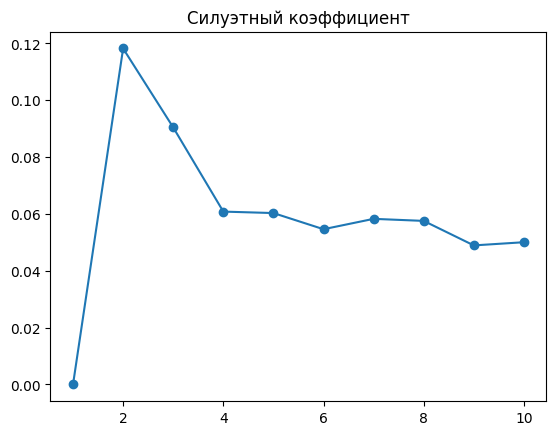

In [ ]:
plt.title('Силуэтный коэффициент')
plt.plot(range(1,n+1), silhouette, marker='o');

С точки зрения силуэтного коэффициента оптимальное число кластеров - 2

## Снижение размерности

In [ ]:
n_clusters = 2
agg = KMeans(n_clusters=n_clusters, random_state=10, n_init=10).fit(embeddings)
labels = agg.labels_

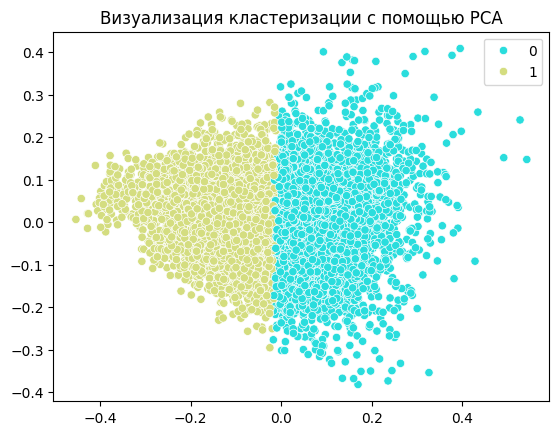

In [ ]:
plt.title('Визуализация кластеризации с помощью PCA')
sns.scatterplot(x=embeddings_pca[:,0], y=embeddings_pca[:,1], hue=labels, palette='rainbow');

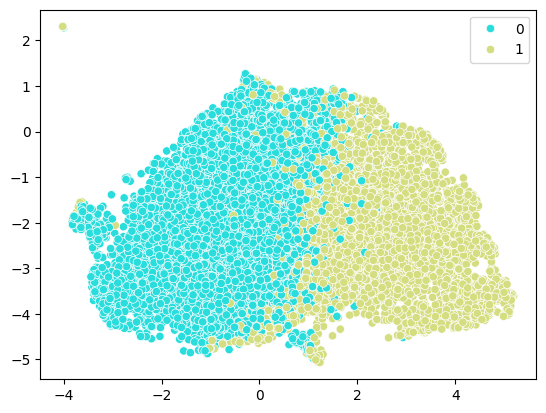

In [ ]:
sns.scatterplot(x=embeddings_umap[:,0], y=embeddings_umap[:,1], hue=labels, palette='rainbow');

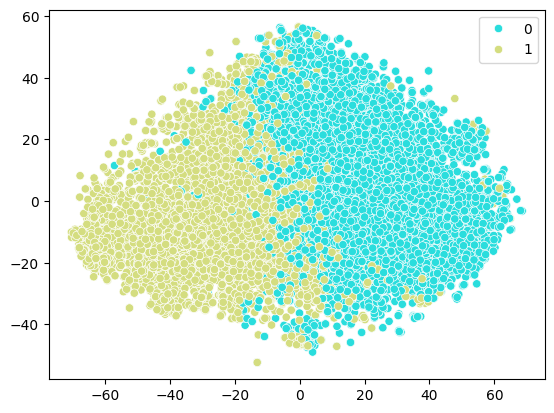

In [ ]:
sns.scatterplot(x=embeddings_tsne[:,0], y=embeddings_tsne[:,1], hue=labels, palette='rainbow');

Как будто и правда прослеживается лишь 2 класса

In [ ]:
df

,rating,date,userId,title,text
0,5,2024-03-22T14:03:50.923848Z,28586749,Отзыв персональному менеджеру Тинькоффбанка,Выражаю свою благодарность и признательность п...
1,1,2024-03-22T03:41:48.096739Z,28559899,Нарушение прав человека — невозможно закрыть к...,"Впарили кредитку, попользовался — денег банку ..."
2,5,2024-03-20T13:32:26.076317Z,24524247,Сейчас тинькофф прайвет — Лучшее предложение н...,Пользуюсь сервисом Private уже около года. До ...
3,5,2024-03-20T12:54:17.172193Z,28422336,Благодарность,Пользуюсь сервисом Private. Обслуживание удобн...
4,1,2024-03-19T22:23:47.765363Z,6209792,"Сервис-дно, пожалуйста не оформляйте в нем ничего",Видимо в поддержке остался 1 нормальный менедж...
...,...,...,...,...,...
9995,5,2022-02-09T15:19:21.695843Z,16604447,По всем параметрам МОЛОДЦЫ!,"Самый прогрессивный банк, с которым я взаимоде..."
9996,5,2022-02-09T14:35:23.682053Z,2626697,Благодарность за понимание!,Благодарность за понимание!Андрей спасибо боль...
9997,5,2022-02-09T14:04:10.518413Z,1030279,Именно для меня- идеальные продукты для реше...,Около года уже являюсь клиентом Тинькофф Банка...
9998,5,2022-02-09T14:02:04.007323Z,4192372,Онлайн консультации банка,Мне нравится манера общения\n\nв чатах с банко...


In [ ]:
reviews[labels==0]

array(['Выражаю свою благодарность и\xa0признательность персональному менеджеру Ирине Р. Работали с\xa0ней в\xa0течении 1 года безупречно, съели ни\xa0один пуд настроек, отчетов, справок, выписок, открытие новых р/с, эквайрингов и\xa0прочее. Доступно объянит, быстро решит любой вопрос. Впрочем, как и\xa0всегда при обращении в\xa0банк, поддержка клиентов\xa0— одна из\xa0лучших. Наша организация является клиентом еще двух банков, так что есть с\xa0чем сравнить. Ирина\xa0— вы\xa0лучшая! Спасибо за\xa0работу! Желаю процветания и\xa0роста только ввысь!',
       'Впарили кредитку, попользовался\xa0— денег банку не\xa0принёс, да\xa0вот я\xa0гад такой.\nАбсолютно тупая поддержка, закрыть карту без голоса сложно, нужно на\xa0них давить, а\xa0так 2/5 оценка банка была\xa0бы.',
       'Пользуюсь сервисом Private уже около года. До\xa0этого был премиум. Также есть премиум в\xa0других банках.\n\nПремиум тинькофф мне нравился, а\xa0прайвет также хорош как премиум, только во\xa0всем лучше (плюс это д

In [ ]:
reviews[labels==1]

array(['Отличный банк для любых финансовых нужд!\n\nЯ\xa0уже долгие годы являюсь клиентом Тинькофф банка и\xa0хочу поделиться своим положительным опытом использования их\xa0услуг. Во-первых, мне нравится удобство и\xa0простота в\xa0использовании мобильного приложения банка. Я\xa0могу легко отслеживать свои финансовые операции, оплачивать счета, переводить деньги и\xa0многое другое, не\xa0выходя из\xa0дома.\n\nКлиентоориентированный подход Тинькофф банка также заслуживает отдельного упоминания. В\xa0случае возникновения вопросов или проблем с\xa0моим счетом, я\xa0всегда могу быстро получить помощь через телефонную поддержку или онлайн-чат.\n\nВ\xa0общем, я\xa0остаюсь довольным клиентом Тинькофф банка и\xa0с\xa0уверенностью могу рекомендовать его всем, кто ищет простое, выгодное и\xa0качественное банковское обслуживание!',
       'Хороший банк и\xa0его продукты. Плюсы\xa0— грамотно оформлен личный кабинет, разберется даже ребёнок, рациональные проценты по\xa0кредиту, быстрое оформление. 

но тяжело понять, чем же они отличаются

# Agglomerative Clustering

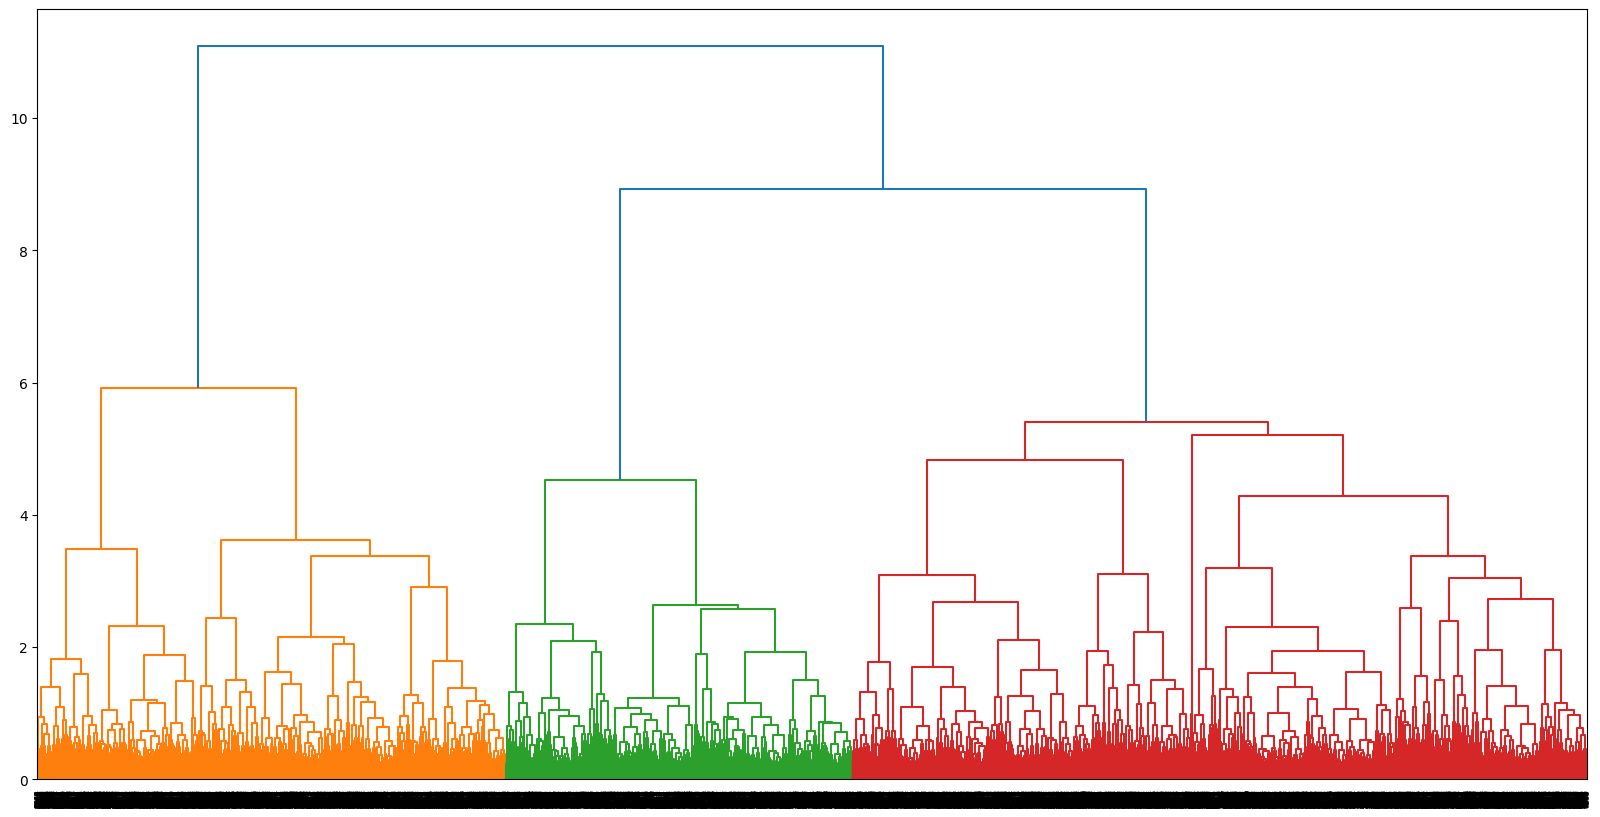

In [ ]:
plt.figure(figsize=(20,10))
linkage_ = linkage(embeddings, method='ward')
dendrogram_ = dendrogram(linkage_)

In [ ]:
def calculate_inertia(X, agg):
    cluster_centers = []
    for label in np.unique(agg.labels_):
        cluster_centers.append(X[agg.labels_ == label].mean(axis=0))

    wcss = 0
    for label in np.unique(agg.labels_):
        cluster_points = X[agg.labels_ == label]
    #     wcss += np.sum((cluster_points - cluster_centers[label]) ** 2)
        wcss += np.sum(np.sum((cluster_points - cluster_centers[label]) ** 2, axis=0))

    return wcss

In [ ]:
inertia = []
n = 20
for i in range(1, n+1):
    agg = AgglomerativeClustering(n_clusters=i).fit(embeddings)
    inertia_i = calculate_inertia(embeddings, agg)
    inertia.append(inertia_i)

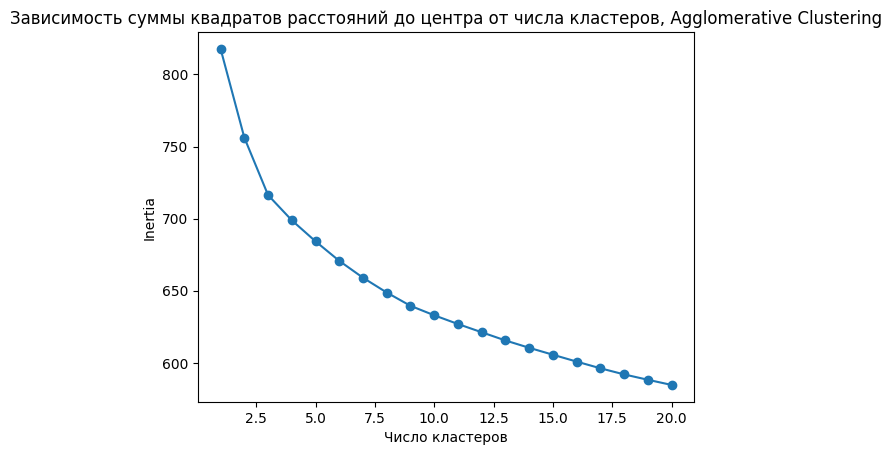

In [ ]:
plt.plot(range(1, n+1), inertia, marker='o')
plt.title('Зависимость суммы квадратов расстояний до центра от числа кластеров, Agglomerative Clustering')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia');

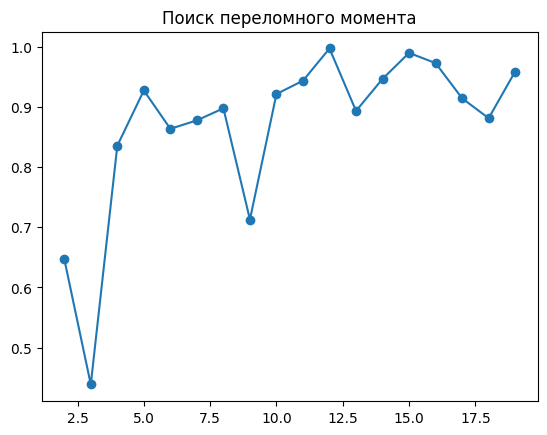

In [ ]:
D = []
for i in range(1, n-1):
    Di = (inertia[i] - inertia[i+1]) / (inertia[i-1] - inertia[i])
    D.append(Di)

plt.title('Поиск переломного момента')
plt.plot(range(2,n), D, marker='o');

In [ ]:
silhouette = []
n = 20
for i in tqdm(range(2,n+1)):
    agg = AgglomerativeClustering(n_clusters=i).fit(embeddings)
    labels = agg.labels_
    score = silhouette_score(embeddings, labels)
    silhouette.append(score)

100%|██████████| 19/19 [07:17<00:00, 23.01s/it]


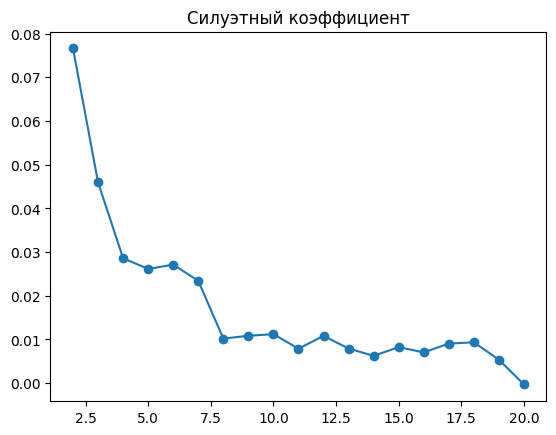

In [ ]:
plt.title('Силуэтный коэффициент')
plt.plot(list(range(2,n+1)), silhouette, marker='o');

При числе кластеров больше 2 силуэтный коэффициент падает

In [ ]:
n_clusters = 2
agg = AgglomerativeClustering(n_clusters=n_clusters).fit(embeddings)
labels = agg.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
score = silhouette_score(embeddings, labels)
print('Силуэтный скор: {:.4f} \nЧисло кластеров: {}'.format(score, n_clusters))

Силуэтный скор: 0.0766 
Число кластеров: 2


## Снижение размерности

In [ ]:
n_clusters = 2
agg = AgglomerativeClustering(n_clusters=n_clusters).fit(embeddings)
labels = agg.labels_
uniq_labels = np.unique(labels)

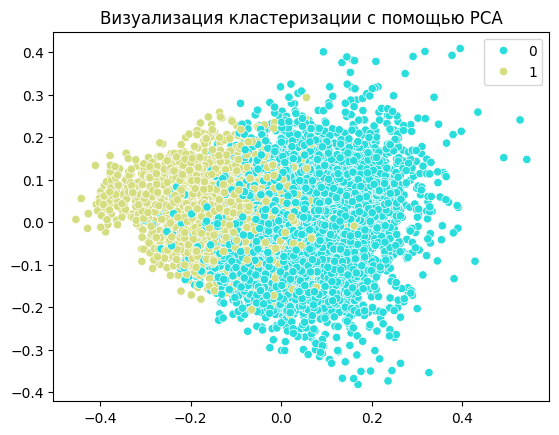

In [ ]:
plt.title('Визуализация кластеризации с помощью PCA')
sns.scatterplot(x=embeddings_pca[:,0], y=embeddings_pca[:,1], hue=labels, palette='rainbow');

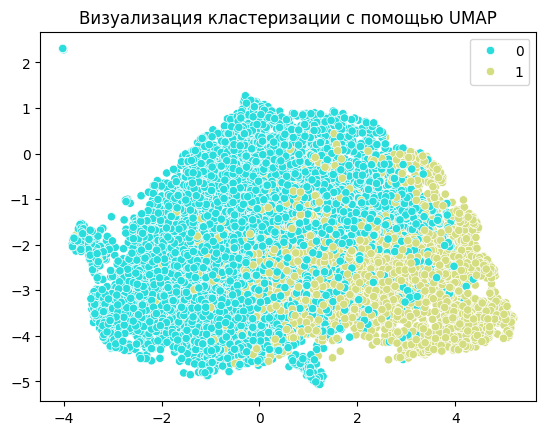

In [ ]:
plt.title('Визуализация кластеризации с помощью UMAP')
sns.scatterplot(x=embeddings_umap[:,0], y=embeddings_umap[:,1], hue=labels, palette='rainbow');

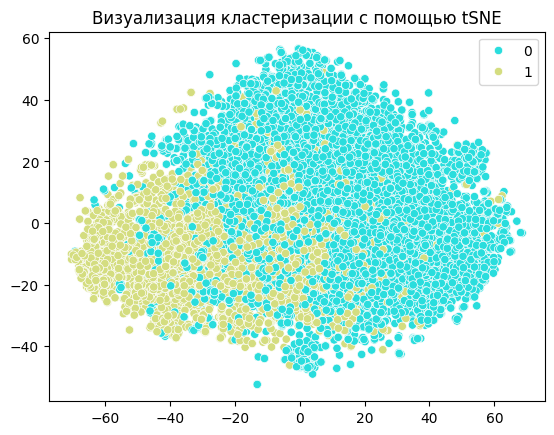

In [ ]:
plt.title('Визуализация кластеризации с помощью tSNE')
sns.scatterplot(x=embeddings_tsne[:,0], y=embeddings_tsne[:,1], hue=labels, palette='rainbow');

визуально (и по силуэтному скору) справляется хуже, чем KMeans

Также мы пробовали DBSCAN, но он работал еще хуже